In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# Data
σ = 0.04
r = 0.01
K = 35

# Design choice
dt = 0.1


In [2]:
# simulation function
def S_next(S):
    dZ = np.random.normal(size=S.size) * np.sqrt(dt)
    dS = r * S  * dt + σ  * S  * dZ
    S = S + dS
    return S


In [3]:
#Simulation Step 
#Sample 200000 points in the interval [30, 40]. 

S0 = np.random.uniform(30, 40, 200000)
S = S0

for t in range(10):
    S = S_next(S)
    
S1 = S
payoff = np.maximum(S1 - K, 0.)
discounted_payoff = np.exp(-r) * payoff

y = discounted_payoff
x = S0

# Try simple regression model

In [4]:
#Regression Step 
#f(x, theta) = theta0 + theta1*X
X = np.column_stack([x**k for k in range(2)])
Θ = np.linalg.lstsq(X, y)[0]

def C0(S0):
    X = S0
    X = np.column_stack([x**k for k in range(2)])
    return X @ Θ

<ipython-input-4-37a935dc042f>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Θ = np.linalg.lstsq(X, y)[0]


In [5]:
#True BS Models
t = 0
T = 1
def analytical_formula(S):
    d1 = 1 / (σ * np.sqrt(T - t)) * (np.log(S / K) + (r + σ**2 / 2) * (T - t))
    d2 = d1 - σ * np.sqrt(T - t)
    PV = K * np.exp(-r * (T - t))

    N = norm.cdf
    C = N(d1) * S - N(d2) * PV
    return C


# S0 = np.linspace(30, 40, 100)
C_BS = analytical_formula(S0)

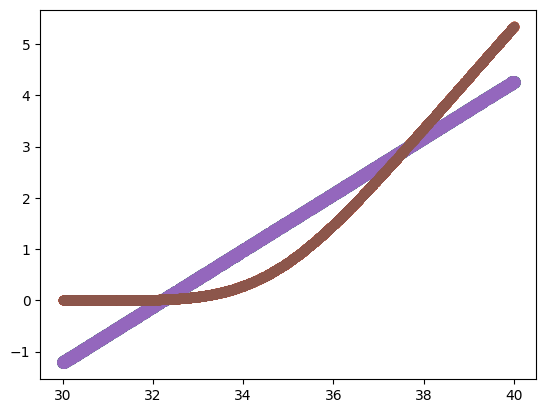

In [8]:
#Compare the Monte Carlo BSM and Theoretical BSM
plt.scatter(S0[:2000], C0(S0)[:2000], lw = 3)
plt.scatter(S0[:2000], C_BS[:2000], lw = 1)
plt.show()

It is not good approximation at all. Simple regression is not good enough. 

# Try more complicate regression model

In [9]:
#Regression Step 
#f(x, theta) = theta0 + theta1*X + theta2*X**2 + ... + theta20 * X**20 
X = np.column_stack([x**k for k in range(20)])
Θ = np.linalg.lstsq(X, y)[0]

def C0(S0):
    X = S0
    X = np.column_stack([x**k for k in range(20)])
    return X @ Θ

<ipython-input-9-f198a4e45e19>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Θ = np.linalg.lstsq(X, y)[0]


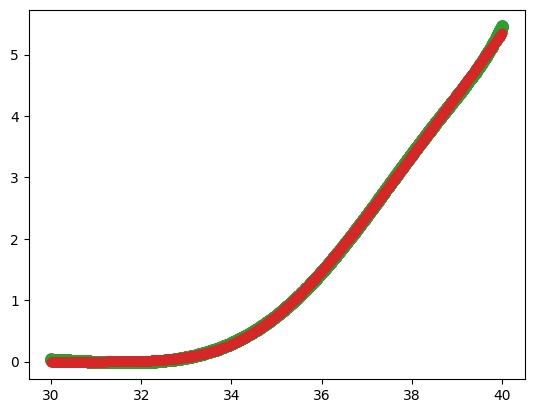

In [11]:
#Compare the Monte Carlo BSM and Theoretical BSM
plt.scatter(S0[:2000], C0(S0)[:2000], lw = 3)
plt.scatter(S0[:2000], C_BS[:2000], lw = 1)
plt.show()

Better fits. 

In [12]:
for j in range(1, 20):
    S = 0
    X = np.column_stack([x**k for k in range(j)])
    Θ = np.linalg.lstsq(X, y)[0]
    def C0(S0):
        X = S0
        X = np.column_stack([x**k for k in range(j)])
        return X @ Θ
    for i in range(100):
        S += (C0(S0)[i] -  C_BS[i]) ** 2
    print(j, ":", (S/100)**0.5)

<ipython-input-12-b5f66bc985ee>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Θ = np.linalg.lstsq(X, y)[0]


1 : 1.7155577645524072
2 : 0.6121573055500041
3 : 0.09056171098187171
4 : 0.08210523542922003
5 : 0.023156358705913555
6 : 0.01793962965439145
7 : 0.01651529083444165
8 : 0.014768090741681662
9 : 0.012910959289043166
10 : 0.011180449242860165
11 : 0.009933244810639558
12 : 0.009515601902322895
13 : 0.010037524908351513
14 : 0.011262961840661292
15 : 0.012822346550126824
16 : 0.014412979090382597
17 : 0.015833997656378235
18 : 0.01695987019909119
19 : 0.01771530027333566


We can notice that actually 13 is the best. 

<ipython-input-13-41aa6ee53fc6>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Θ = np.linalg.lstsq(X, y)[0]


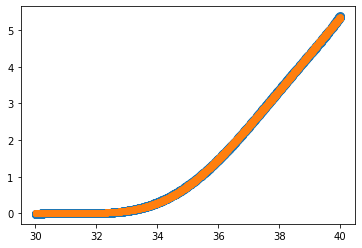

In [13]:
X = np.column_stack([x**k for k in range(13)])
Θ = np.linalg.lstsq(X, y)[0]
def C0(S0):
    X = S0
    X = np.column_stack([x**k for k in range(13)])
    return X @ Θ

#Compare the Monte Carlo BSM and Theoretical BSM
plt.scatter(S0[:2000], C0(S0)[:2000], lw = 3)
plt.scatter(S0[:2000], C_BS[:2000], lw = 1)

# Use initial Stock Price 36 to approximate 

In [24]:
#Simulation Step 
#Sample 200000 points in the interval [30, 40]. 

#instead of sampling the entire range, we starts from S0 = 36. 

S0 = np.ones(200000) * 36
S = S0

for t in range(10):
    S = S_next(S)
    
S1 = S
payoff = np.maximum(S1 - K, 0.)
discounted_payoff = np.exp(-r) * payoff

y = discounted_payoff
x = S0

In [25]:
y.mean()

1.4712357804988287

In [26]:
#Regression Step 
#f(x, theta) = theta0 + theta1*X
X = np.column_stack([x**k for k in range(2)])
Θ = np.linalg.lstsq(X, y)[0]

def C0(S0):
    X = S0
    X = np.column_stack([x**k for k in range(2)])
    return X @ Θ

<ipython-input-26-37a935dc042f>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Θ = np.linalg.lstsq(X, y)[0]


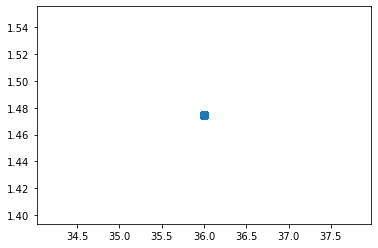

In [28]:
#Compare the Monte Carlo BSM and Theoretical BSM
plt.scatter(S0[:2000], C0(S0)[:2000], lw = 3)
#plt.scatter(S0[:2000], C_BS[:2000], lw = 1)